<a href="https://colab.research.google.com/github/Nochs24/325-Midterm/blob/main/Nick_Ochs_Midterm_Project_325_Spring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)



#The purpose of my project is to investigate why voter registration is higher or lower during certain times of the year. The goal is to educate the audience on which months are most popular for new registered voters. It is important for someone to read this notebook if they are interested in learning about voter registration trends. I also hope to educate others on potential setbacks and societal events that affect voter registration numbers. My two research questions to focus on are:

#How did voter registration change from January-March in 2016 as compared to 2020. Why do you think this is?

#What is the general consensus difference when comparing the registered voters in 2016 to 2020. What are some potential societal events during this time period that could have caused these trends?

## 1. Data Processing

In [3]:
voters.head(5)



,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


New registered voters is the amount of new registered voters that month. Jurisdiction is the state.

In [4]:
voters.isna().any()


,0
Jurisdiction,False
Year,False
Month,False
New registered voters,False


There is no missing data

In [5]:
voters.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


Jurisdiction = Object,
Year = int64,
month= object,
new registered voters= int64

In [6]:
voters = voters.rename(columns={"Jurisdiction":"NAME", "New registered voters":"registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Some potential limitations to the dataset are the fact that you can not see data about all of the states.
The other limitation is that you can only see data from select months out of the year.

###Exploratory Data Analysis

In [7]:
high_voter = voters.sort_values(by="registered_voters", ascending=False).head(1)
high_voter


,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


February 2020 California had the highest number of registered voters at 238281

In [8]:
avg_voter = voters["registered_voters"].mean()
avg_voter

48223.46226415094

The average voter registration is 48223

In [9]:
high_voters = voters[voters["registered_voters"] > 48223]
high_voters.info()


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 93
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               36 non-null     object
 1   Year               36 non-null     int64 
 2   Month              36 non-null     object
 3   registered_voters  36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


The amount of times a states voter registration was higher than the average was 36 times.

In [10]:
high_voters["NAME"].value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Each state and each time they went over the national average are listed above.

In [11]:
high_voters = high_voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False).head(3)


In [12]:
high_voters


,registered_voters
NAME,
California,159627.571429
Texas,134466.125000
Illinois,74252.250000


The 3 states with the highest average voter registration overall were California, Texas, and Illinois.

##Data Visualization

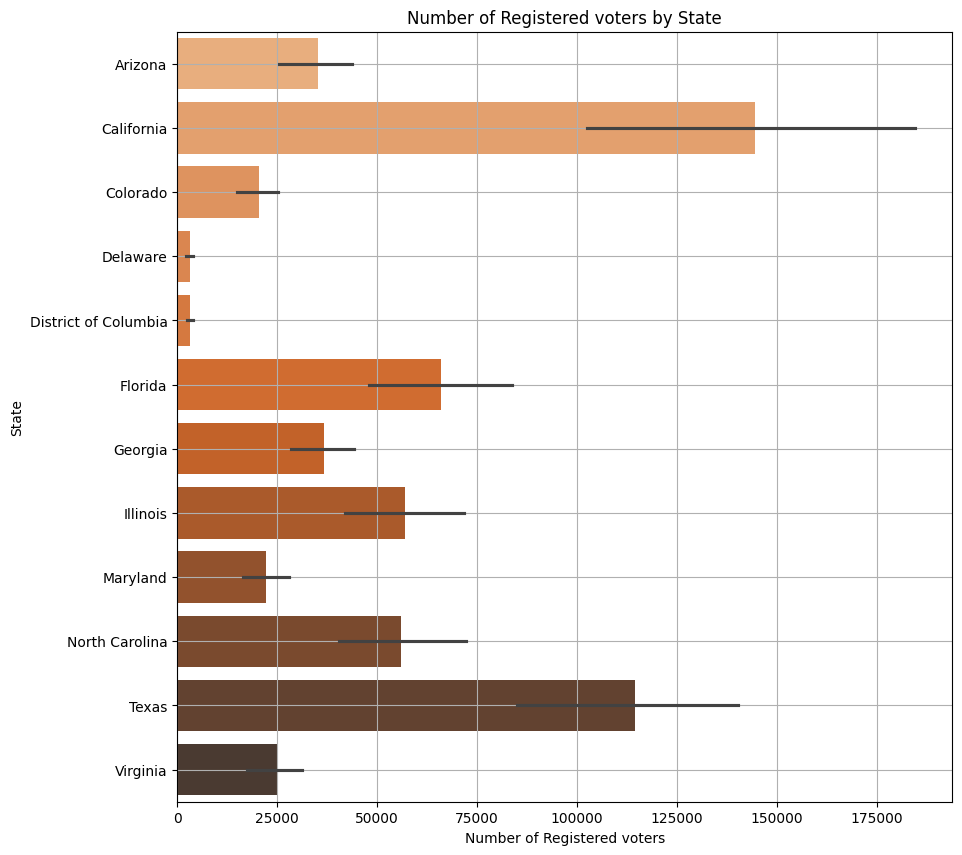

In [14]:
voters_reset = voters.reset_index()
plt.figure(figsize=(10,10))
sns.barplot(voters_reset, x="registered_voters", y="NAME", hue="NAME", palette="Oranges_d")
plt.xlabel("Number of Registered voters")
plt.ylabel("State")
plt.title("Number of Registered voters by State")
plt.grid()


#The states with the highest number of registered voters are Texas, and California. The states with the lowest number of registered voters are Delaware, Washington D.C.. With my knowledge of the United States I think it is safe to assume that states with a larger population, generally, have more registered voters.

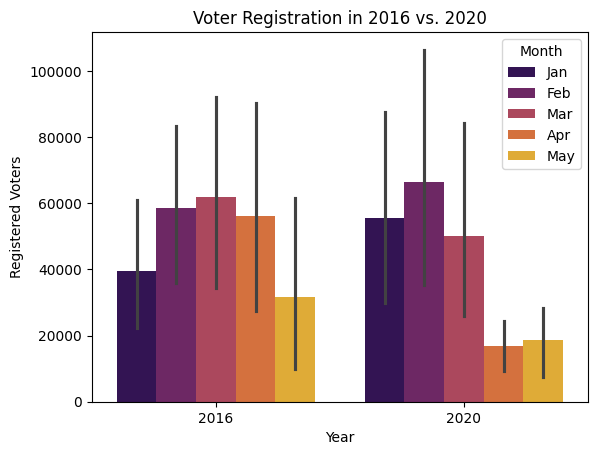

In [93]:
voter_1 = voters
sns.barplot(data=voter_1, x="Year", y="registered_voters", hue="Month", palette="inferno")
plt.xlabel("Year")
plt.ylabel("Registered Voters")
plt.legend(title = "Month")
plt.title("Voter Registration in 2016 vs. 2020")
plt.show()


#I noticed that voter registration was more consistent in 2016, whereas in 2020 April and May saw a large decrease in voter registration. A potential reason for this could have been because of COVID-19. In 2020, more voters registered in January, than in 2016.

#What is the general consensus difference when comparing the registered voters in 2016 to 2020. What are some potential societal events during this time period that could have caused these trends?

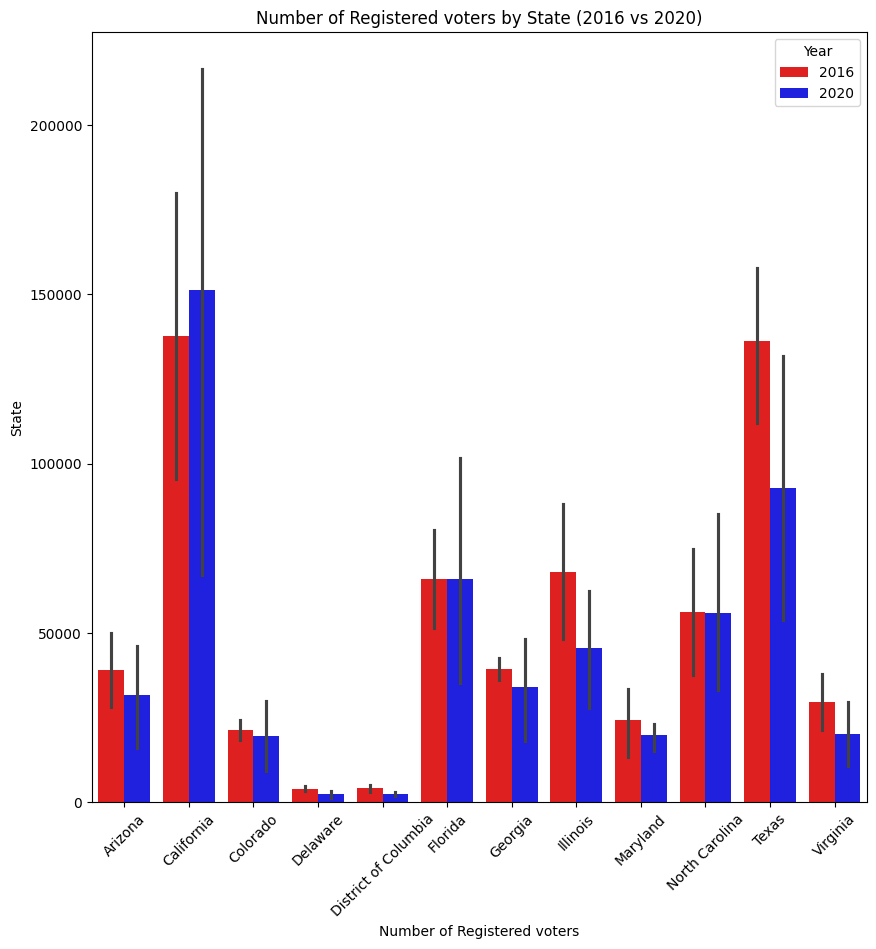

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(voters_reset, y="registered_voters", x="NAME", hue="Year", palette=["red", "blue"])
plt.xlabel("Number of Registered voters")
plt.ylabel("State")
plt.title("Number of Registered voters by State (2016 vs 2020)")
plt.xticks(rotation=45)
plt.show()


#I think that in most cases the registered voters by each state decreased from 2016 to 2020. This could be up for debate as to why this happened, but it is reasonable to say that COVID played a significant role in the decreasing amount registered voters in 2020.

##Mapping



In [47]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.74 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [48]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)


In [49]:
states.head(3)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."


<Axes: >

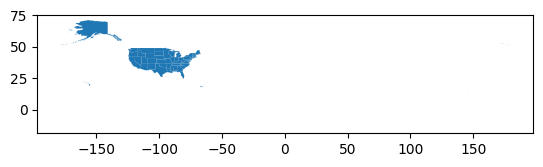

In [50]:
states.plot()

In [51]:
xmin, ymin, xmax, ymax = -125, 24.396308, -66.93457, 49.384358

<Axes: >

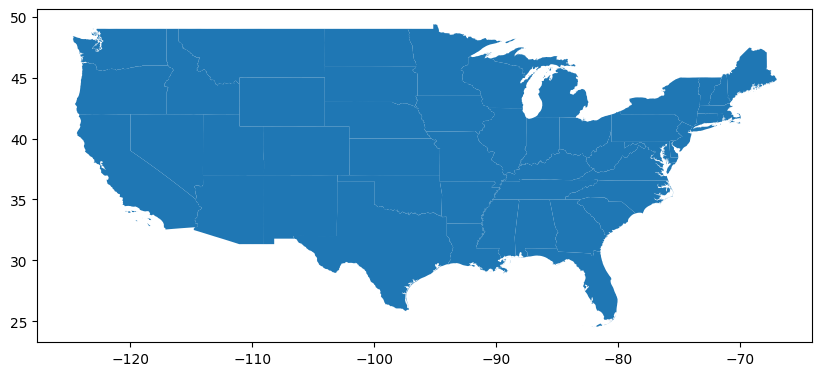

In [52]:
bbox = states.cx[xmin:xmax, ymin:ymax]

bbox.plot(figsize=(10, 10))

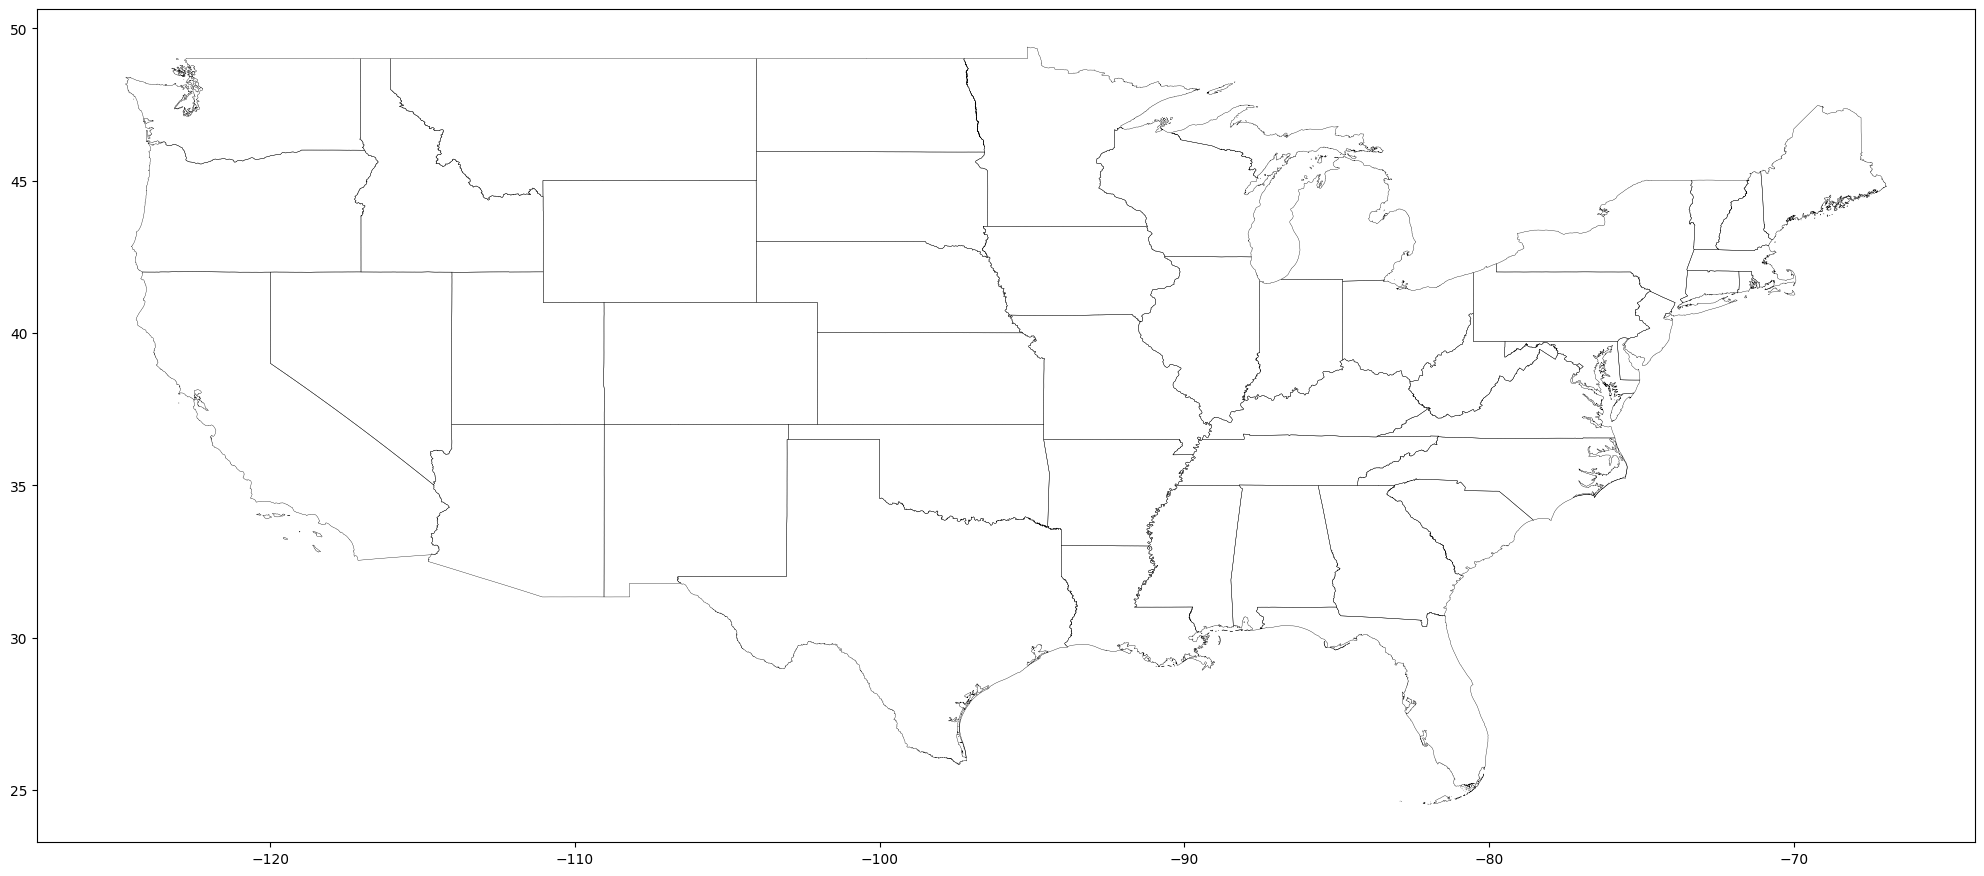

In [53]:
us_map=bbox.boundary.plot(figsize=(25,15),linewidth=.25, edgecolor="black")

In [55]:
avg_voter_1 = voters.groupby('NAME')["registered_voters"].mean()
avg_voter_1


,registered_voters
NAME,
Arizona,35311.500
California,144545.375
Colorado,20527.500
Delaware,3166.375
District of Columbia,3248.400
Florida,65868.125
Georgia,36604.125
Illinois,56840.375
Maryland,22133.500


In [56]:
map_data = bbox.merge(avg_voter_1, on="NAME", how="left")
map_data

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",NaN
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",NaN
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",NaN
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2...",NaN
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",NaN
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",NaN
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",NaN
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125


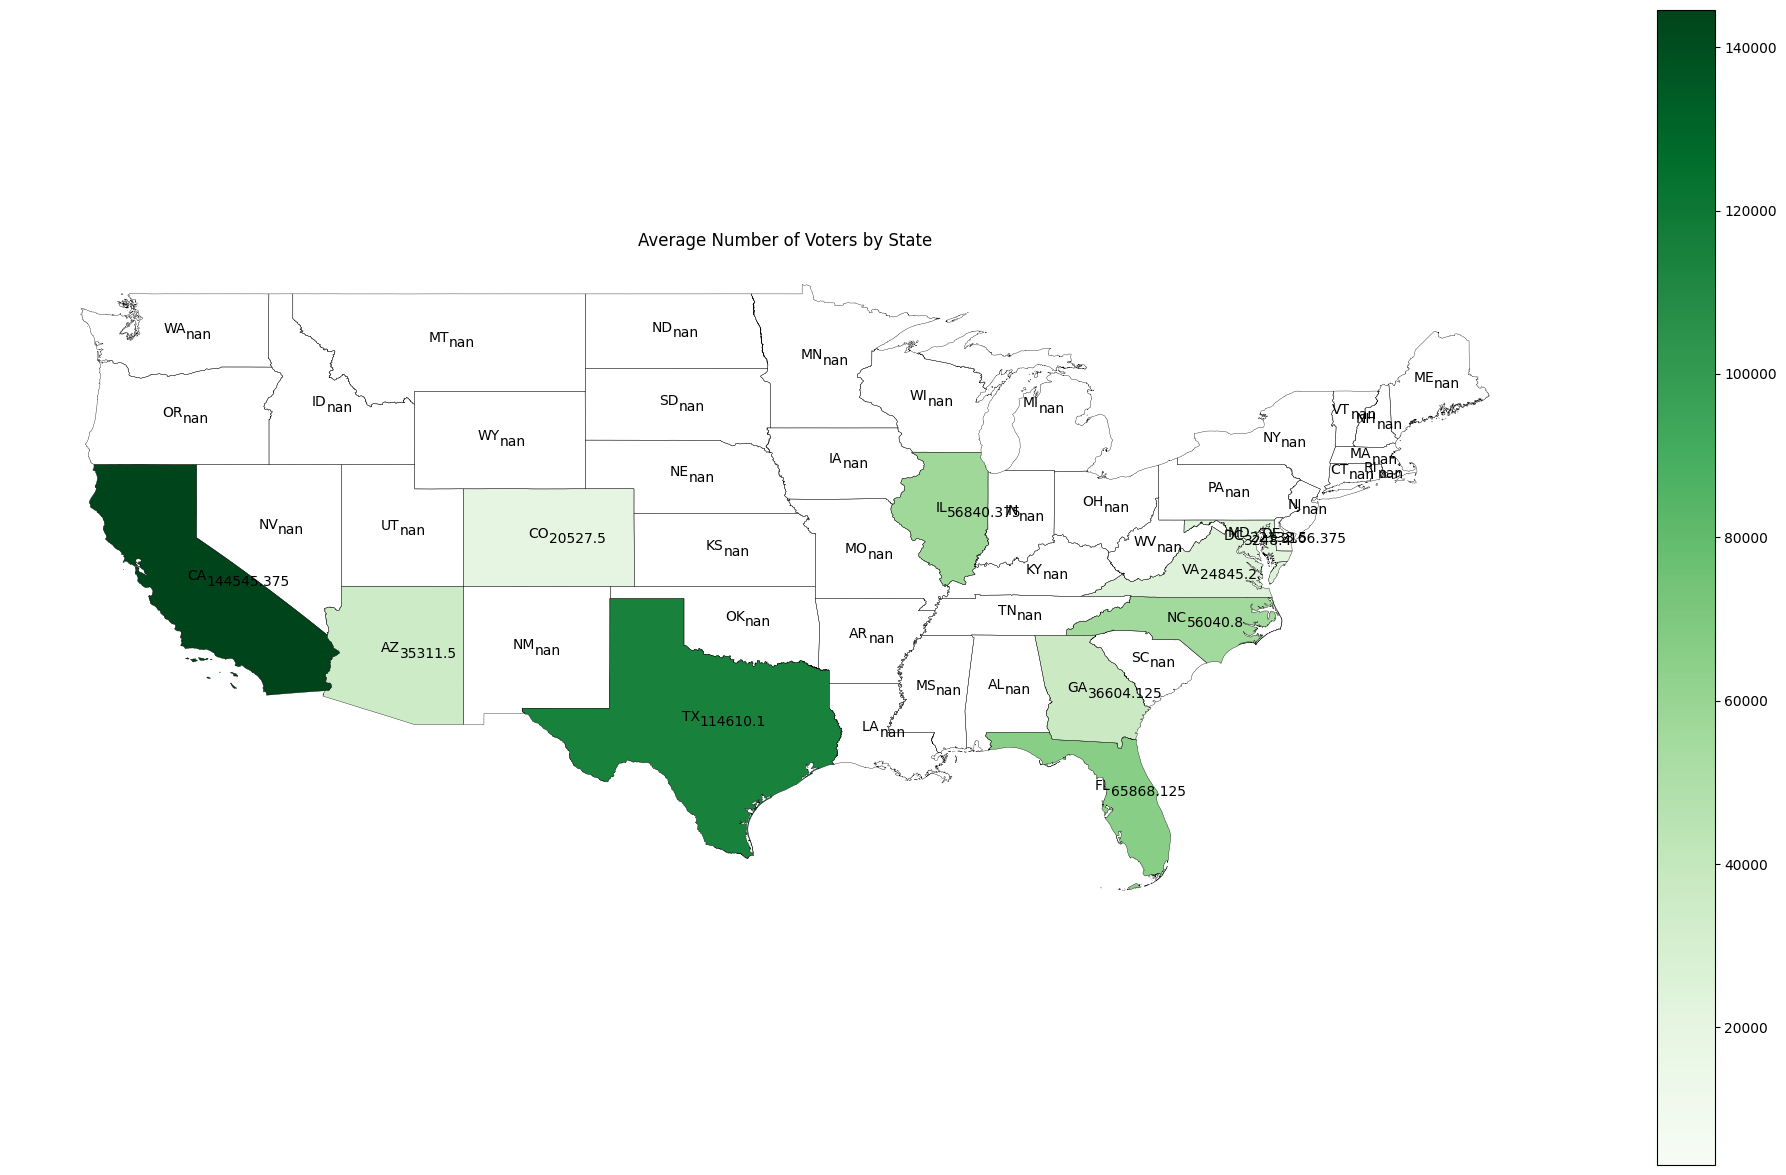

In [90]:
us_map=bbox.boundary.plot(figsize=(25,15),linewidth=.25, edgecolor="black")
map_data.plot(ax=us_map, column="registered_voters", cmap="Greens", legend=True)
map_data.apply(lambda x: us_map.annotate(text=x.STUSPS,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="right",fontsize=10),axis=1)
map_data.apply(lambda x: us_map.annotate(text=x.registered_voters,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),va="center_baseline",fontsize=10),axis=1)
plt.title("Average Number of Voters by State")
us_map.axis("off")
plt.show()

##Conclusion



Insights: I believe that the findings from this notebook will be very helpful for the companies future insights. I have found that the amount of registered voters in a state relies heavily on the total population. As you can see from most of the visualizations California, Texas, and Florida are all states with larger populations and more registered voters on average. I think another factor that played a role in the outcome of my findings were events like COVID that had an effect on the amount of people who got out and registered to vote in 2020.

Suggestions: I think that in order to continue to see positive trends in the future, and avoid any decline in voter registration numbers it is imperative that you create a safe way to register to vote online instead of in person. Another way to obtain more realistic, and relevant data is to collect data from 50 states that way the trends are more understandable. There may be plenty of data to be collected based on demographics of certain states which were not included in the dataset.

Possible Next Steps: As previously mentioned I think that we must sharpen the outcome of future research by collecting a larger sample size. By doing this I believe we will be able to collect more accurate data, and have a deeper understanding as to why certain states voter registration performs the way they do. Also, including voter registration for all months, not just the first four can be another way to receive more precise data collection, and can give us more information to work with.

##Github


# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Nicholas Ochs
